In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [6]:
def load_csv():
    """
    :return: a dataframe containing our X and Y values
    """
    all_data = pd.read_excel('C:\\Users\\dataset\\ALL_dataset.xls', index_col=0)
#     del aml_data['DrawID']
#     aml_data['caseflag'].replace({'Yes': 1, 'No': -1}, inplace=True)
#     return aml_data
    return all_data


In [7]:
all_data = load_csv()

In [8]:
all_data

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,ALB,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.4,NaN,1280.7,11810.9,2.0,62,1,...,41.0,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN
2,2002-11-02,2009-04-20,NaT,1562.5,312.5,937.5,3750.0,2.0,81,1,...,41.0,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN
3,1997-02-24,2009-07-21,NaT,2717.0,1235.0,247.0,21736.0,2.0,50,1,...,43.0,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN
4,2004-03-02,2009-05-05,NaT,2091.0,NaN,2509.2,16309.8,NaN,74,2,...,34.0,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN
5,2006-12-04,2009-04-02,NaT,2175.6,777.0,932.4,27972.0,2.0,86,1,...,42.8,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2002-08-13,2003-06-15,2003-06-15,782.6,301.0,842.8,4394.6,1.0,61,1,...,37.0,5.85,1.06,0.70,2.70,NaN,1.0,1.0,2.0,306.0
262,1997-10-08,2008-01-30,NaT,NaN,NaN,NaN,NaN,NaN,88,2,...,36.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
263,2001-01-08,2003-04-15,2003-04-15,1050.0,450.0,750.0,13200.0,2.0,79,1,...,36.0,13.90,1.37,0.43,2.40,NaN,2.0,2.0,2.0,827.0


In [9]:
#all_data[all_data['Diagnosis date'].notnull() & (all_data['Record date'].notnull())]
idx= all_data[(all_data['Exitus'].isna())]
# df_test['Difference'] = df_test['Difference'] / np.timedelta64(1, 'D')

In [10]:
idx['Dates_difference'] = idx['Record date'] - idx['Diagnosis date']

C:\Users\installations\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
idx

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus,Dates_difference
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.4,NaN,1280.7,11810.9,2.0,62,1,...,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN,1916 days
2,2002-11-02,2009-04-20,NaT,1562.5,312.5,937.5,3750.0,2.0,81,1,...,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN,2361 days
3,1997-02-24,2009-07-21,NaT,2717.0,1235.0,247.0,21736.0,2.0,50,1,...,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN,4530 days
4,2004-03-02,2009-05-05,NaT,2091.0,NaN,2509.2,16309.8,NaN,74,2,...,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN,1890 days
5,2006-12-04,2009-04-02,NaT,2175.6,777.0,932.4,27972.0,2.0,86,1,...,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN,850 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2003-02-11,2009-01-21,NaT,1910.4,477.6,318.4,13691.2,2.0,68,2,...,6.78,0.64,0.78,NaN,NaN,1.0,NaN,2.0,NaN,2171 days
256,2007-05-14,2009-07-31,NaT,2796.8,1104.0,883.2,3680.0,2.0,77,2,...,8.47,0.85,0.59,3.08,3.00,1.0,2.0,2.0,NaN,809 days
260,2004-09-07,2009-03-10,NaT,4596.8,1825.2,676.0,1487.2,2.0,60,1,...,10.10,2.59,0.99,2.30,NaN,1.0,2.0,2.0,NaN,1645 days


In [12]:
idx#performed Nan check for exitus since we need to find time later for Exitus Nan values

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus,Dates_difference
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.4,NaN,1280.7,11810.9,2.0,62,1,...,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN,1916 days
2,2002-11-02,2009-04-20,NaT,1562.5,312.5,937.5,3750.0,2.0,81,1,...,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN,2361 days
3,1997-02-24,2009-07-21,NaT,2717.0,1235.0,247.0,21736.0,2.0,50,1,...,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN,4530 days
4,2004-03-02,2009-05-05,NaT,2091.0,NaN,2509.2,16309.8,NaN,74,2,...,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN,1890 days
5,2006-12-04,2009-04-02,NaT,2175.6,777.0,932.4,27972.0,2.0,86,1,...,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN,850 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2003-02-11,2009-01-21,NaT,1910.4,477.6,318.4,13691.2,2.0,68,2,...,6.78,0.64,0.78,NaN,NaN,1.0,NaN,2.0,NaN,2171 days
256,2007-05-14,2009-07-31,NaT,2796.8,1104.0,883.2,3680.0,2.0,77,2,...,8.47,0.85,0.59,3.08,3.00,1.0,2.0,2.0,NaN,809 days
260,2004-09-07,2009-03-10,NaT,4596.8,1825.2,676.0,1487.2,2.0,60,1,...,10.10,2.59,0.99,2.30,NaN,1.0,2.0,2.0,NaN,1645 days


In [13]:
df = all_data.drop(columns=['Diagnosis date', 'Record date','Exitus date','Exitus','AID'])
print(df)#df is final frame

        TLC     T8C     NCC      MBC  CD38   AGE  SEX  NLymph   SMG    WBC  \
ID                                                                           
1    1138.4     NaN  1280.7  11810.9    2.0   62    1      0.0  2.0  18240   
2    1562.5   312.5   937.5   3750.0    2.0   81    1      0.0  2.0  10280   
3    2717.0  1235.0   247.0  21736.0    2.0   50    1      0.0  2.0  32020   
4    2091.0     NaN  2509.2  16309.8    NaN   74    2      3.0  2.0  25880   
5    2175.6   777.0   932.4  27972.0    2.0   86    1      0.0  1.0  39120   
..      ...     ...     ...      ...    ...  ...  ...      ...  ...    ...   
261   782.6   301.0   842.8   4394.6    1.0   61    1      3.0  2.0  13170   
262     NaN     NaN     NaN      NaN    NaN   88    2      0.0  2.0  31670   
263  1050.0   450.0   750.0  13200.0    2.0   79    1      0.0  2.0  18750   
264    34.2    22.8    19.0    326.8    2.0   78    2      3.0  1.0   2390   
265  4743.7  1851.2   925.6   5900.7    1.0   82    2      3.0  

In [14]:
#replace 2.0,1.0 for ctx
df['Ctx_tgt'] = [0.0 if x == 2.0 else 1.0 for x in df['Ctx']] 
print(df)


print(len(df[df.Ctx_tgt == 1.0]))

        TLC     T8C     NCC      MBC  CD38   AGE  SEX  NLymph   SMG    WBC  \
ID                                                                           
1    1138.4     NaN  1280.7  11810.9    2.0   62    1      0.0  2.0  18240   
2    1562.5   312.5   937.5   3750.0    2.0   81    1      0.0  2.0  10280   
3    2717.0  1235.0   247.0  21736.0    2.0   50    1      0.0  2.0  32020   
4    2091.0     NaN  2509.2  16309.8    NaN   74    2      3.0  2.0  25880   
5    2175.6   777.0   932.4  27972.0    2.0   86    1      0.0  1.0  39120   
..      ...     ...     ...      ...    ...  ...  ...      ...  ...    ...   
261   782.6   301.0   842.8   4394.6    1.0   61    1      3.0  2.0  13170   
262     NaN     NaN     NaN      NaN    NaN   88    2      0.0  2.0  31670   
263  1050.0   450.0   750.0  13200.0    2.0   79    1      0.0  2.0  18750   
264    34.2    22.8    19.0    326.8    2.0   78    2      3.0  1.0   2390   
265  4743.7  1851.2   925.6   5900.7    1.0   82    2      3.0  

In [15]:
#sampling freq length of dataframe - total count of records
count_nan = len(df) - df.count()

In [16]:
count_nan.tolist()

[9,
 36,
 24,
 24,
 118,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 65,
 4,
 26,
 15,
 2,
 1,
 7,
 25,
 24,
 5,
 2,
 12,
 8,
 10,
 4,
 9,
 9,
 9,
 17,
 207,
 3,
 6,
 0]

In [17]:
store=[]
sample_freq=[]
for i in range(len(count_nan)):
    store.append(len(df)-count_nan[i])

print(store)
# count_nan
sample_freq = []
for k in store:
    k = k/len(df) * 100
    sample_freq.append(k)

[256, 229, 241, 241, 147, 265, 265, 264, 264, 265, 265, 265, 265, 265, 265, 200, 261, 239, 250, 263, 264, 258, 240, 241, 260, 263, 253, 257, 255, 261, 256, 256, 256, 248, 58, 262, 259, 265]


In [18]:
print(len(sample_freq))

38


In [19]:
sample_freq = list(filter(lambda x: x > [50], sample_freq))#after filtering less than 50% score

In [20]:
print(sample_freq)

[96.60377358490567, 86.41509433962264, 90.9433962264151, 90.9433962264151, 55.471698113207545, 100.0, 100.0, 99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 98.86792452830188, 97.73584905660377, 100.0]


In [21]:


data = {'Variables': ['TLC','T8C','NCC',' MBC','CD38 ','AGE','SEX','NLymph','SMG','WBC','ALC',
 'SNC',' HGB ','MCV','PLT','RET','MOR','LD','COOMBS','UR','CR','UA ','NA',
 'K','GOT','GPT','ALP','LDH ','BU','ALB','IgG','IgA','IgM','B2M',
 'MP','Ctx_tgt'],'Sample_freq':[96.60377358490567, 86.41509433962264, 
        90.9433962264151, 90.9433962264151, 55.471698113207545, 100.0, 100.0, 
        99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 
        100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 
        99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 
        98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 
        98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 
        98.86792452830188, 97.73584905660377]} 

df_with_sfreq = pd.DataFrame(data,columns = ['Variables', 'Sample_freq'])
print(df_with_sfreq)

   Variables  Sample_freq
0        TLC    96.603774
1        T8C    86.415094
2        NCC    90.943396
3        MBC    90.943396
4      CD38     55.471698
5        AGE   100.000000
6        SEX   100.000000
7     NLymph    99.622642
8        SMG    99.622642
9        WBC   100.000000
10       ALC   100.000000
11       SNC   100.000000
12      HGB    100.000000
13       MCV   100.000000
14       PLT   100.000000
15       RET    75.471698
16       MOR    98.490566
17        LD    90.188679
18    COOMBS    94.339623
19        UR    99.245283
20        CR    99.622642
21       UA     97.358491
22        NA    90.566038
23         K    90.943396
24       GOT    98.113208
25       GPT    99.245283
26       ALP    95.471698
27      LDH     96.981132
28        BU    96.226415
29       ALB    98.490566
30       IgG    96.603774
31       IgA    96.603774
32       IgM    96.603774
33       B2M    93.584906
34        MP    98.867925
35   Ctx_tgt    97.735849


In [22]:
from sklearn.impute import KNNImputer
# from sklearn.preprocessing.Imputer import KNNImputer
imputer = KNNImputer(n_neighbors=1)

df_filled = pd.DataFrame(imputer.fit_transform(df))

C:\Users\installations\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


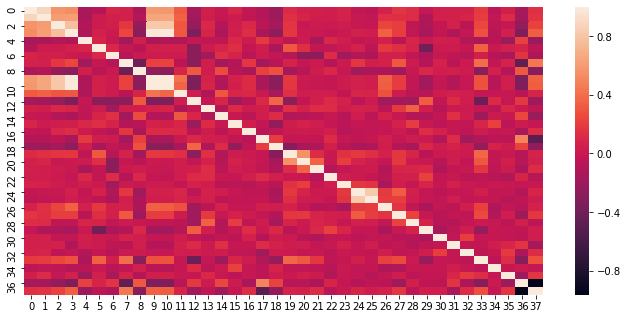

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = df_filled.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr)

In [24]:
df_filled

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1138.40,1331.10,1280.7,11810.90,2.0,62.0,1.0,0.0,2.0,18240.0,...,1.60,41.0,7.79,1.92,1.24,1.06,74.00,1.0,2.0,0.0
1,1562.50,312.50,937.5,3750.00,2.0,81.0,1.0,0.0,2.0,10280.0,...,0.60,41.0,11.90,1.71,0.49,3.18,0.00,1.0,1.0,1.0
2,2717.00,1235.00,247.0,21736.00,2.0,50.0,1.0,0.0,2.0,32020.0,...,1.00,43.0,9.46,1.32,0.49,2.00,0.27,2.0,1.0,1.0
3,2091.00,605.50,2509.2,16309.80,1.0,74.0,2.0,3.0,2.0,25880.0,...,0.40,34.0,11.30,2.31,2.13,4.84,1.30,1.0,1.0,1.0
4,2175.60,777.00,932.4,27972.00,2.0,86.0,1.0,0.0,1.0,39120.0,...,0.40,42.8,7.00,0.65,0.20,5.36,1.20,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,782.60,301.00,842.8,4394.60,1.0,61.0,1.0,3.0,2.0,13170.0,...,0.90,37.0,5.85,1.06,0.70,2.70,0.00,1.0,1.0,1.0
261,2315.15,657.99,2437.0,19617.85,1.0,88.0,2.0,0.0,2.0,31670.0,...,0.31,36.0,9.80,2.34,0.85,1.54,0.02,1.0,2.0,1.0
262,1050.00,450.00,750.0,13200.00,2.0,79.0,1.0,0.0,2.0,18750.0,...,0.51,36.0,13.90,1.37,0.43,2.40,1.30,2.0,2.0,0.0
263,34.20,22.80,19.0,326.80,2.0,78.0,2.0,3.0,1.0,2390.0,...,1.90,43.0,5.93,0.95,0.31,7.10,4.00,1.0,2.0,0.0


In [25]:
count_nan1 = len(df_filled) - df_filled.count()

In [26]:
count_nan1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [27]:
column_s = df.columns
print(column_s)
df_filled.columns = column_s

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')


In [28]:
cols = ['Ctx','AID']
#cols = [36,37]
print(df_filled.columns)
X = df_filled[df_filled.columns.difference(cols)]
print(X.columns)
Y = df_filled['Ctx_tgt']#0/1 tgt variable
#print(Y)

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')
Index([' HGB ', ' MBC', 'AGE', 'ALB', 'ALC', 'ALP', 'B2M', 'BU', 'CD38 ',
       'COOMBS', 'CR', 'Ctx_tgt', 'GOT', 'GPT', 'IgA', 'IgG', 'IgM', 'K', 'LD',
       'LDH ', 'MCV', 'MOR', 'MP', 'NA', 'NCC', 'NLymph ', 'PLT', 'RET', 'SEX',
       'SMG', 'SNC', 'T8C', 'TLC', 'UA ', 'UR', 'WBC', 'ZAP_70'],
      dtype='object')


In [29]:
#print(df_filled)
print(column_s)

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=112)

In [31]:
from sklearn.feature_selection import chi2

In [32]:
fisher_score = chi2(X_train, y_train)
fisher_score
#Two arrays are returned: F scores and P value. More the P value, more difference between the distributions.

(array([1.82330230e+00, 9.31002328e+05, 2.28350037e-01, 6.24127737e-02,
        9.81340696e+05, 4.09064922e+01, 9.16330775e+00, 5.54609685e-02,
        1.23865241e+00, 3.73318524e-01, 3.53069637e-03, 1.46000000e+02,
        2.94685352e+01, 2.35484403e+00, 6.42001086e+00, 9.12688770e+01,
        8.57179673e+01, 1.05744101e-03, 3.98922435e+00, 1.07134067e+02,
        3.75046111e-01, 5.42410405e-01, 4.78373802e-01, 4.94127980e-02,
        1.15190566e+04, 8.51550545e+01, 2.57693558e+05, 1.52069617e+04,
        6.16830176e-01, 1.22403135e+00, 4.11638993e+03, 8.20484696e+03,
        7.07364741e+03, 3.67618475e+00, 2.33960041e+00, 1.07754641e+06,
        3.56351158e+00]),
 array([1.76920697e-01, 0.00000000e+00, 6.32749959e-01, 8.02722309e-01,
        0.00000000e+00, 1.59689770e-10, 2.46915857e-03, 8.13819495e-01,
        2.65730926e-01, 5.41200922e-01, 9.52617852e-01, 1.29819858e-33,
        5.68319045e-08, 1.24894376e-01, 1.12841471e-02, 1.25417827e-21,
        2.07518766e-20, 9.74058708e-01

In [33]:
p_values = pd.Series(fisher_score[0])
print(min(p_values))
p_values.index = X_train.columns
p_values.sort_values(ascending=False)
#Smaller the p_value, more significant the feature is to predict the target value i

0.0010574410143974725


WBC        1.077546e+06
ALC        9.813407e+05
 MBC       9.310023e+05
PLT        2.576936e+05
RET        1.520696e+04
NCC        1.151906e+04
T8C        8.204847e+03
TLC        7.073647e+03
SNC        4.116390e+03
Ctx_tgt    1.460000e+02
LDH        1.071341e+02
IgG        9.126888e+01
IgM        8.571797e+01
NLymph     8.515505e+01
ALP        4.090649e+01
GOT        2.946854e+01
B2M        9.163308e+00
IgA        6.420011e+00
LD         3.989224e+00
UA         3.676185e+00
ZAP_70     3.563512e+00
GPT        2.354844e+00
UR         2.339600e+00
 HGB       1.823302e+00
CD38       1.238652e+00
SMG        1.224031e+00
SEX        6.168302e-01
MOR        5.424104e-01
MP         4.783738e-01
MCV        3.750461e-01
COOMBS     3.733185e-01
AGE        2.283500e-01
ALB        6.241277e-02
BU         5.546097e-02
NA         4.941280e-02
CR         3.530696e-03
K          1.057441e-03
dtype: float64

In [34]:
from sklearn.feature_selection import SelectPercentile, chi2
X_train.shape
X_new = SelectPercentile(chi2, percentile=50).fit_transform(X_train, y_train)
pd.DataFrame(data=X_new[1:,1:],columns=X_new[0,1:])

,7520.00,52.00,1.27,0.00,26.00,1.66,9.70,0.71,299.00,376.00,0.00,212000.00,110000.00,4020.00,526.40,1729.60,12620.00
0,8810.0,48.0,1.21,0.0,17.0,1.60,7.44,0.47,256.0,528.6,2.0,214000.0,57500.0,3130.0,792.9,1497.7,12580.0
1,15290.0,72.0,2.10,0.0,21.0,0.76,517.00,0.30,300.0,764.5,0.0,154000.0,11020.0,6550.0,764.5,1223.2,22580.0
2,37560.0,68.0,7.12,0.0,11.0,0.39,6.42,0.19,308.0,751.2,0.0,147000.0,46700.0,5860.0,2253.6,2629.2,47280.0
3,7060.0,48.0,3.20,1.0,23.0,2.84,12.80,0.79,471.0,917.8,3.0,136000.0,47400.0,4820.0,564.8,1765.0,13500.0
4,6460.0,35.0,6.00,0.0,19.0,3.48,12.80,0.88,450.0,532.0,0.0,165000.0,88800.0,3670.0,1098.2,1615.0,11200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,11060.0,52.0,2.40,0.0,23.0,3.41,12.50,1.65,291.0,518.4,2.0,171000.0,78500.0,5710.0,1769.6,3207.4,18470.0
207,7970.0,62.0,1.70,1.0,21.0,0.67,5.59,0.44,280.0,398.5,3.0,150000.0,48300.0,2550.0,159.4,557.9,11450.0
208,14490.0,81.0,2.30,0.0,20.0,4.20,10.30,0.45,309.0,1159.2,0.0,204000.0,60100.0,4550.0,869.4,2173.5,20510.0
209,1470.0,57.0,5.20,1.0,37.0,0.65,18.30,0.69,289.0,161.7,3.0,319000.0,70200.0,1160.0,235.2,426.3,3000.0


In [35]:
#cols = ['GPT','IgA','B2M','GOT','IgM','NLymph ','IgG','LDH ','RET','SNC','T8C','TLC','ALC','PLT','WBC',' MBC','NCC']

cols = ['WBC','ALC',' MBC','PLT']
#cols = [' MBC', 'ALC', 'BU', 'CR', 'PLT', 'RET', 'T8C', 'WB C']
#cols = [' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']
X_c=X_train[cols]
X_t= X_test[cols]

In [36]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_c, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
y_pre = clf.predict_proba(X_t)
y_pre = y_pre[:, 1]
print(y_pre)

[0.26092953 0.22607343 0.41889468 0.24404464 0.22629158 0.23756236
 0.42131671 0.2424988  0.2234853  0.23463608 0.2490218  0.27876372
 0.26922443 0.31693728 0.23176209 0.23955064 0.24367992 0.24578874
 0.28812477 0.41430201 0.24856246 0.28653423 0.28386714 0.24377858
 0.27069404 0.22537138 0.25770952 0.23229296 0.24520087 0.24664849
 0.2318316  0.22981427 0.23522084 0.23957148 0.27105383 0.24413418
 0.24273286 0.24721049 0.25302867 0.28546483 0.22457783 0.25634754
 0.22579224 0.9585423  0.34317621 0.23480535 0.24936137 0.23585061
 0.2284401  0.93753493 0.2399082  0.27635123 0.26497343]


In [40]:
# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
# # plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [89]:
#print(y_test)
print(len(y_pre))

53


In [90]:
print(clf.score(X_t, y_test))

0.8301886792452831


In [91]:
def ROC():
        import matplotlib.pyplot as plt
 
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pre)
        
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pre)
        
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='SVM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

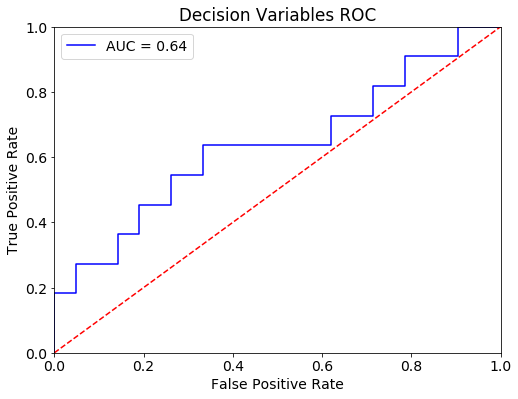

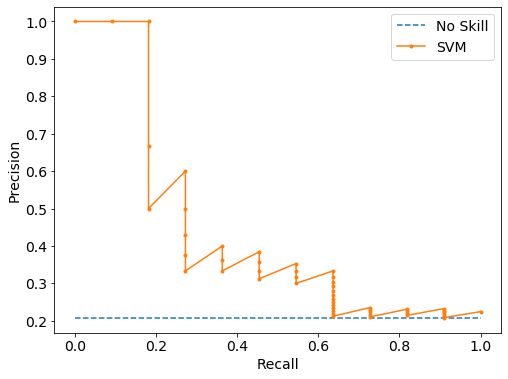

In [92]:
ROC() #first call for SVM 

In [93]:
# from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, y_pre)
# print(matrix.diagonal()/matrix.sum(axis=1))

In [94]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100,min_samples_split = 72,
                                n_jobs = -1, verbose = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_c,y_train)

y_predt=clf.predict(X_t)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [95]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predt))

Accuracy: 0.7735849056603774


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        42
         1.0       0.43      0.27      0.33        11

    accuracy                           0.77        53
   macro avg       0.63      0.59      0.60        53
weighted avg       0.74      0.77      0.75        53



In [97]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predt)
print(matrix.diagonal()/matrix.sum(axis=1))

[0.9047619  0.27272727]


In [98]:
def ROC():
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_predt)
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predt)
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='SVM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

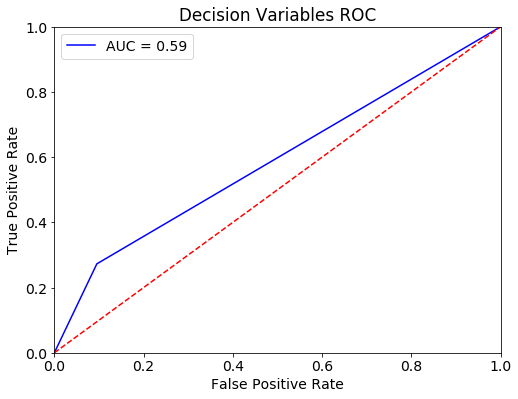

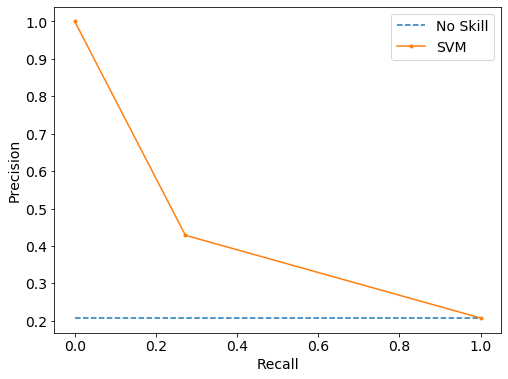

In [99]:
ROC()

In [42]:
import statsmodels.api as sm

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
model.pvalues


C:\Users\installations\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


const      9.943770e-01
 HGB       9.968979e-01
 MBC       8.715112e-01
AGE        9.940056e-01
ALB        9.973550e-01
ALC        9.521062e-01
ALP        9.931060e-01
B2M        9.918032e-01
BU         9.970968e-01
CD38       9.982687e-01
COOMBS     9.984438e-01
CR         9.990717e-01
Ctx_tgt    0.000000e+00
GOT        9.996265e-01
GPT        9.979661e-01
IgA        9.977736e-01
IgG        9.957764e-01
IgM        9.999942e-01
K          9.998303e-01
LD         9.999823e-01
LDH        9.984768e-01
MCV        9.914486e-01
MOR        9.991654e-01
MP         9.994036e-01
NA         9.998592e-01
NCC        9.548661e-01
NLymph     9.935172e-01
PLT        1.968433e-07
RET        1.536669e-01
SEX        9.989338e-01
SMG        9.993643e-01
SNC        9.500403e-01
T8C        9.887254e-01
TLC        9.718997e-01
UA         9.985695e-01
UR         9.987402e-01
WBC        8.547707e-01
ZAP_70     9.975671e-01
dtype: float64

In [43]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.9):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'Ctx_tgt', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']


In [137]:
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier

# clf=RandomForestClassifier(n_estimators = 5000,random_state = 42)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_c,y_train)

# y_pred=clf.predict(X_t)

In [138]:
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6417910447761194


In [50]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_c,y_train)

In [51]:
y_pred=clf.predict(X_t)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.6226415094339622

In [53]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_c, y_train)

y_pred = gnb.predict(X_t)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'metrics' is not defined

In [54]:
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0.])

In [55]:
def ROC():
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='SVM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

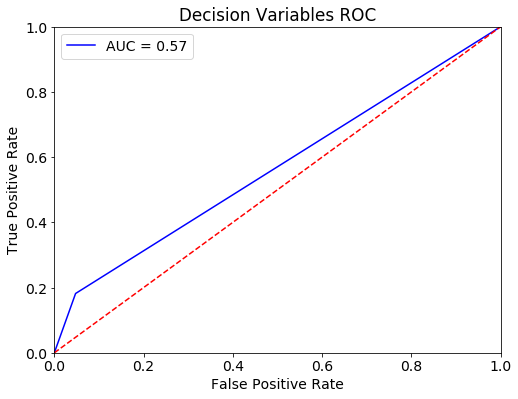

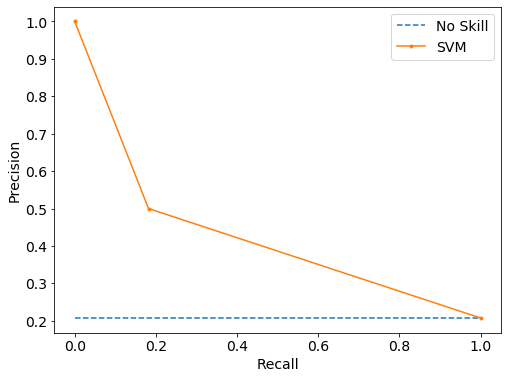

In [56]:
ROC()

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label = y_train)
D_test = xgb.DMatrix(X_test, label = y_test)

In [115]:
param = {
    'eta': 0.3, 
    'max_depth': 8,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 100


In [116]:
model = xgb.train(param, D_train,steps)

In [117]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
